# Testing RTE in synthesis mode (PSF)

In [1]:
# Loading libraries
import matplotlib.pyplot as plt
import numpy as np

import milos as pym
cmd = '../milos/lib/./milos.x'
from astropy.convolution import convolve

In [2]:
model = np.array([2000.,30.,30.,8.5, 0.070, 0.08, 0.2, 0.2, 0.8 ])
model_big = np.zeros((10,9))
for i in range(10):
    model_big[i,:] = [200.,30.,30.,8.5, 0.070, 0.08, 0.2, 0.2, 0.8 ]
    model_big[i,0] = i*100
# B, gamma, phi, eta0, landadopp,aa, vlos, S0, S1
wave_axis = np.linspace(6173.3354-0.4,6173.3354+0.4,30)
# wave_axis = np.array([6173.3354-0.160,6173.3354-0.08,6173.3354,6173.3354+0.08,6173.3354+0.160,6173.3354+0.300])

In [5]:
options = [0,0,0,0,0,0,0,0,0]
options[0] = len(wave_axis) #NLAMBDA wave axis dimension
options[1] = 30 #MAX_ITER max number of iterations
options[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options[3] = 2 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS
options_psf = [0,0,0,0,0,0,0,0,0]
options_psf[0] = len(wave_axis) #NLAMBDA wave axis dimension
options_psf[1] = 30 #MAX_ITER max number of iterations
options_psf[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options_psf[3] = 2 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS
options_psf[4] = 105 #FWHM = atof(argv[5]);
options_psf[5] = int((wave_axis[1] - wave_axis[0])*1000.)#70 ##DELTA = atof(argv[6]);
options_psf[6] = len(wave_axis)  #NMUESTRAS_G = atoi(argv[7]);


In [6]:
out_pmilos_rf = pym.phi_rte(model, wave_axis, rte_mode = 'SYN+RFS',options=options)
out_cmilos_rf = pym.phi_rte(model, wave_axis, rte_mode = 'SYN+RFS',options=options, cmd=cmd)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [30 30  1  2  0  0  0  0  0]
models (milos.pyx):  1
------ flattened:  (9,)
  ---- >>>>> Finishing.... 
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using CMILOS ASCII version
profiles to synthesize = 1
  ---- >>>>> Synthesizing data.... 
../milos/lib/./milos.x 30 30 1 2 0 0 0 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


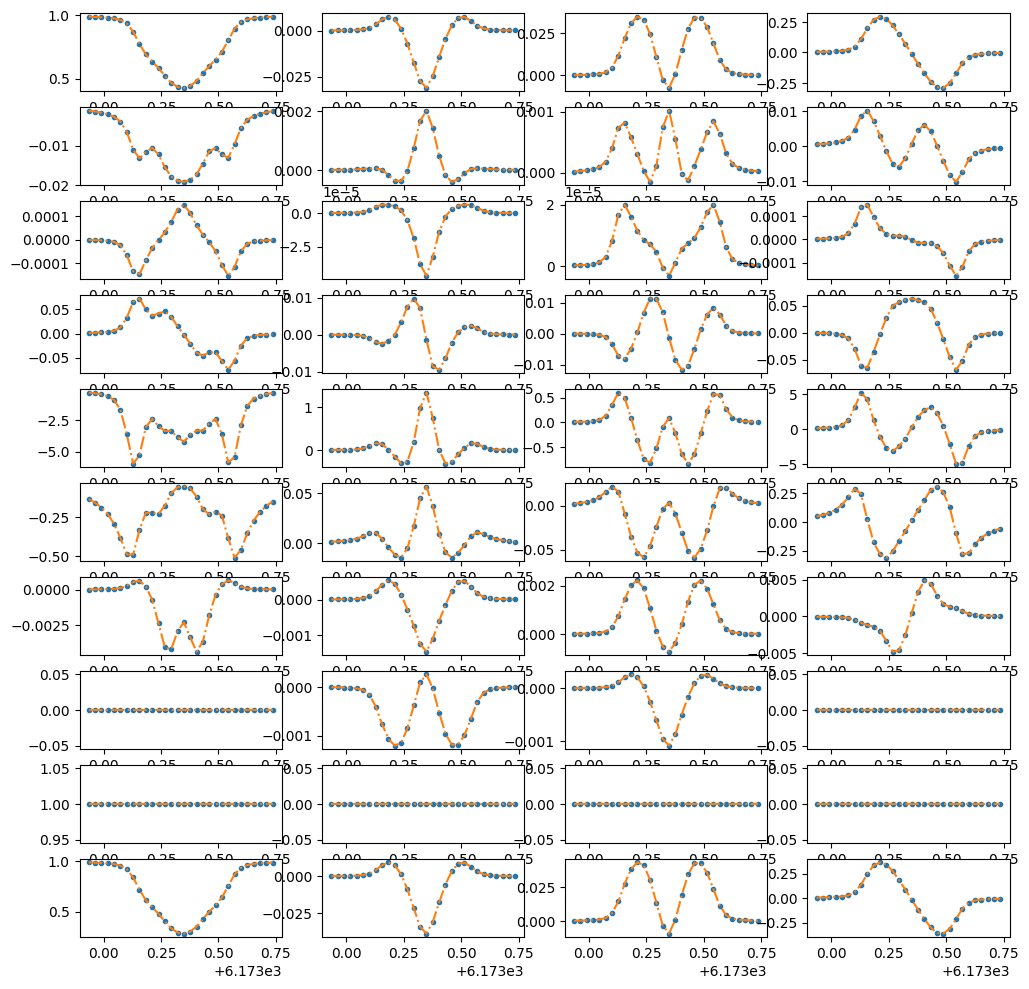

In [7]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[i,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[i,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[i,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[i,3,:],'.')
    ax[i,0].plot(wave_axis,out_cmilos_rf[i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[i,3,:],'-.')

In [8]:
out_pmilos_rf = pym.phi_rte(model_big, wave_axis, rte_mode = 'SYN+RFS',options=options)
out_cmilos_rf = pym.phi_rte(model_big, wave_axis, rte_mode = 'SYN+RFS',options=options, cmd=cmd)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [30 30  1  2  0  0  0  0  0]
models (milos.pyx):  10
------ flattened:  (90,)
  ---- >>>>> Finishing.... 
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using CMILOS ASCII version
profiles to synthesize = 10
  ---- >>>>> Synthesizing data.... 
../milos/lib/./milos.x 30 30 1 2 0 0 0 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


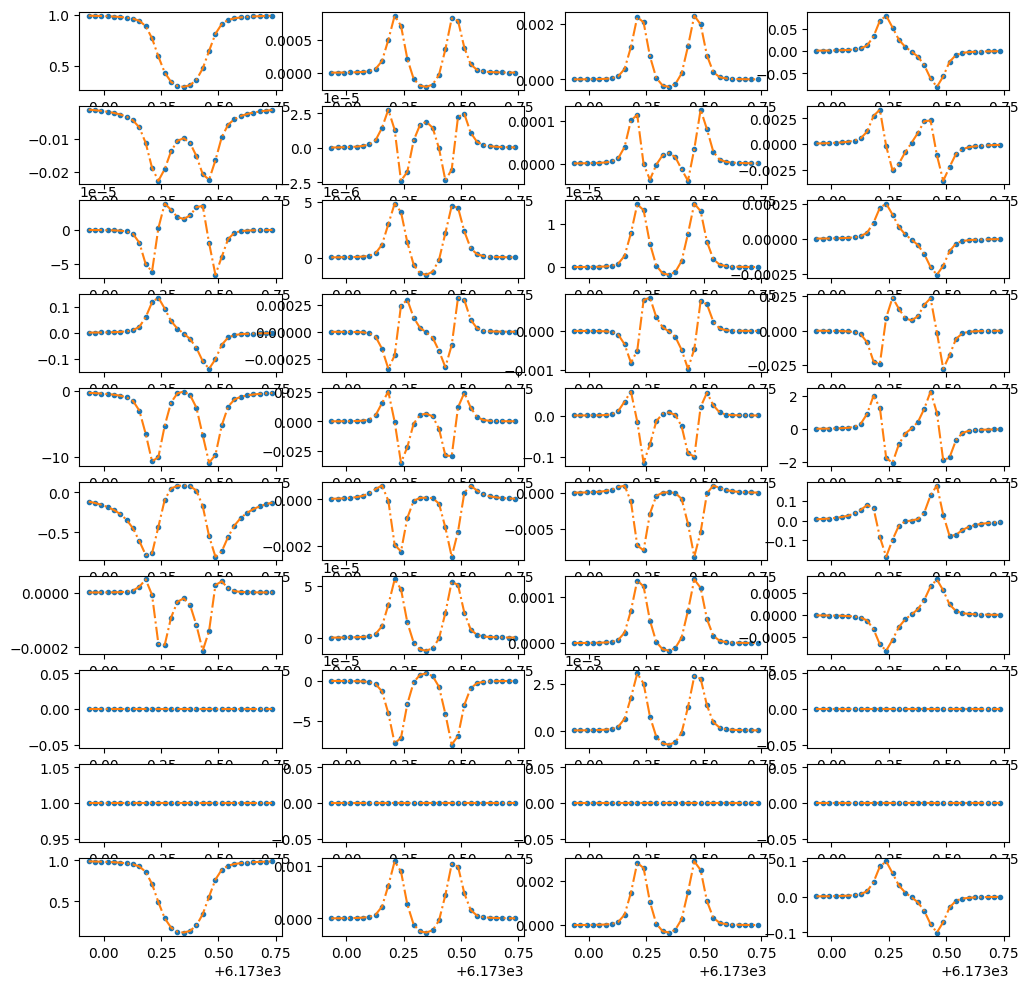

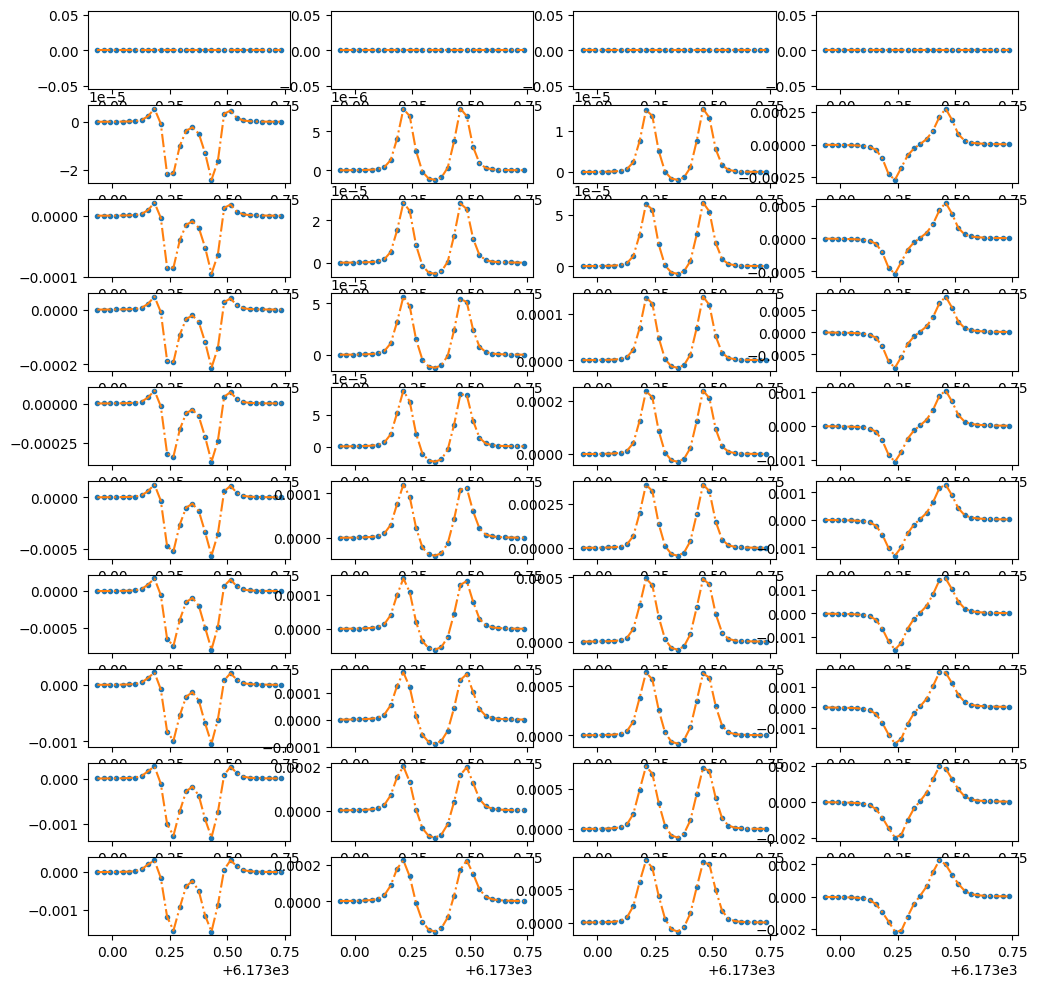

In [9]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
j=3
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[j,i,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[j,i,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[j,i,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[j,i,3,:],'.')
    ax[i,0].plot(wave_axis,out_cmilos_rf[j,i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[j,i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[j,i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[j,i,3,:],'-.')
plt.show()

fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
j=6
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[i,j,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[i,j,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[i,j,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[i,j,3,:],'.')
    ax[i,0].plot(wave_axis,out_cmilos_rf[i,j,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[i,j,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[i,j,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[i,j,3,:],'-.')
plt.show()
